In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import tqdm

In [117]:
data = pd.read_csv('./Datasets/diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [118]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [119]:
min_value = data['Outcome'].value_counts().min()

In [120]:
data = data.groupby('Outcome').apply(lambda x: x.sample(n=min_value, random_state=42)).reset_index(drop=True)

In [121]:
data['Outcome'].value_counts()

Outcome
0    268
1    268
Name: count, dtype: int64

In [122]:
X = data.drop(['Outcome'], axis=1)
y = data['Outcome']

In [123]:
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X))

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [145]:
scores = []
for k in tqdm.tqdm(range(1, 51)):
    clf = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    scores.append(score)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 32.96it/s]


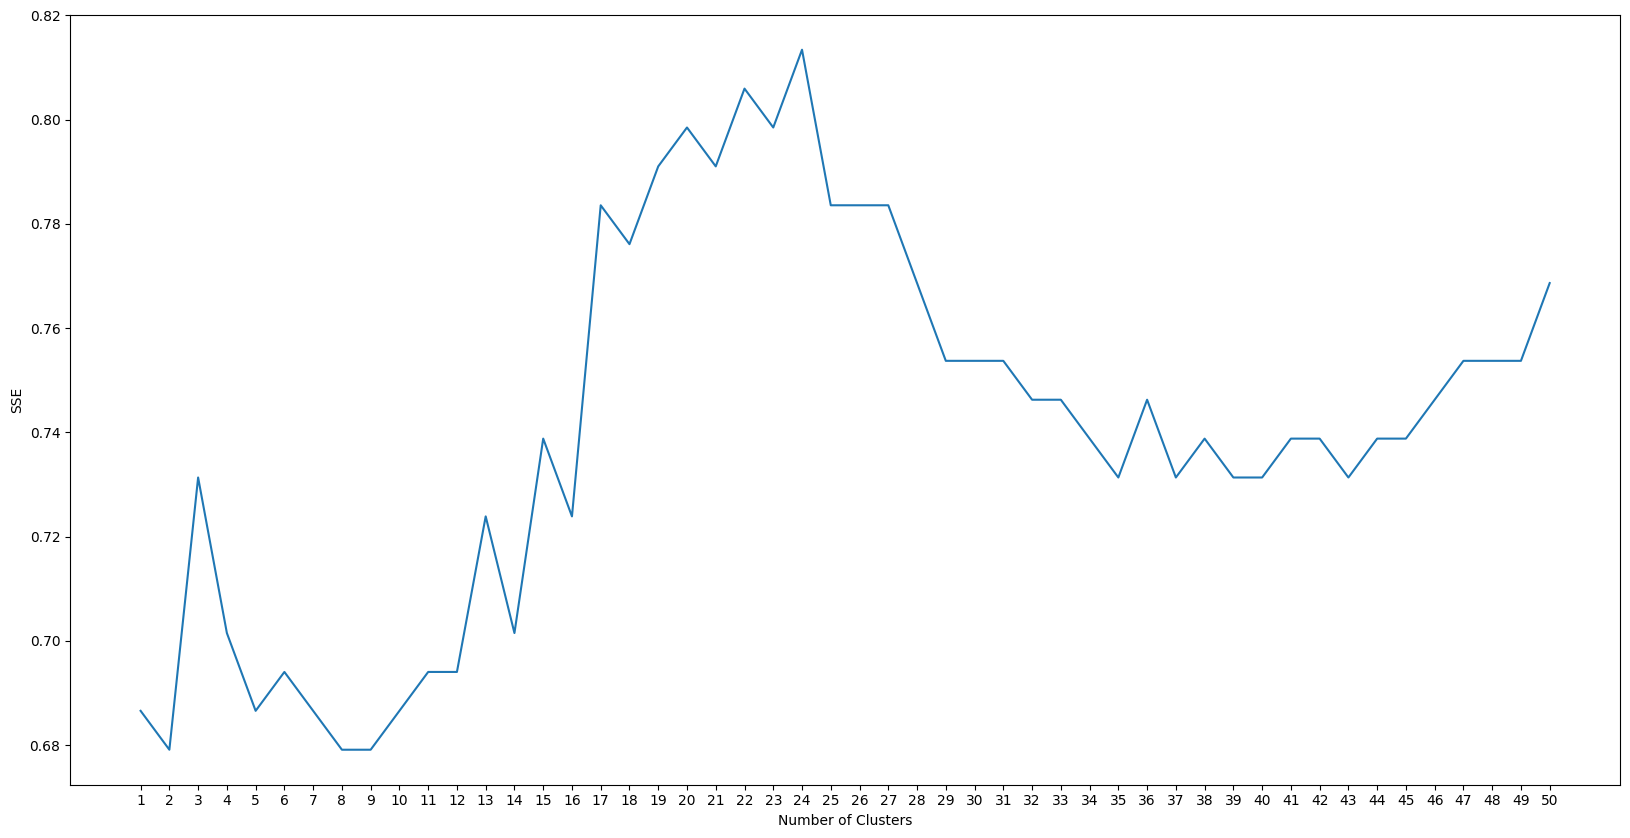

In [158]:
plt.figure(figsize=(20, 10))
plt.plot(range(1, 51), scores)
plt.xticks(range(1, 51))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [147]:
score_max = max(scores)
k_max = scores.index(score_max)

In [148]:
clf = KNeighborsClassifier(n_neighbors=k_max, n_jobs=-1)

In [149]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=23)

In [150]:
clf.score(X_test, y_test)

0.7985074626865671

In [151]:
y_pred = clf.predict(X_test)

In [152]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        69
           1       0.77      0.83      0.80        65

    accuracy                           0.80       134
   macro avg       0.80      0.80      0.80       134
weighted avg       0.80      0.80      0.80       134



<Axes: >

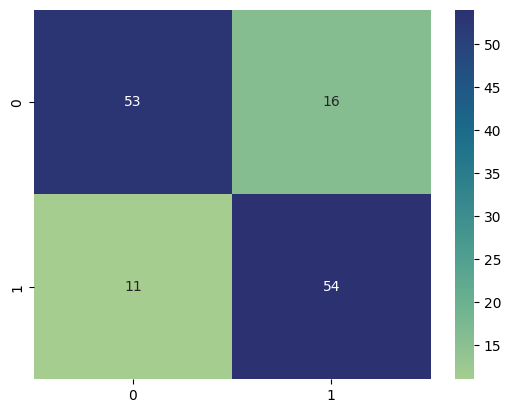

In [153]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='crest')